<a href="https://colab.research.google.com/github/Antonego64/minitarea2/blob/master/minitarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [kpc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [1]:
import numpy as np
archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat'
datos = np.loadtxt(archivo) # Carga los datos a un ndarray

mB=datos[:,0] #magnitud aparente en banda blue
mV=datos[:,1] #magnitud aparente en banda visual
mR=datos[:,2] #magnitud aparente en banda radio
mI=datos[:,3] #magnitud aparente en banda infrared
logTe=datos[:,4] #logaritmo en base 10 del cuociente de la temperatura efectiva y la constante solar
masa=datos[:,5] #masa, en masas solares
d=datos[:,6] #distancia en kilo parsecs

print ('Forma (shape): ' + str(datos.shape)) #aquí se inspecciona la forma
print ('Tamaño (size): ' + str(datos.size))  #aquí se inspeccina el tamaño

Forma (shape): (5298, 7)
Tamaño (size): 37086


## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

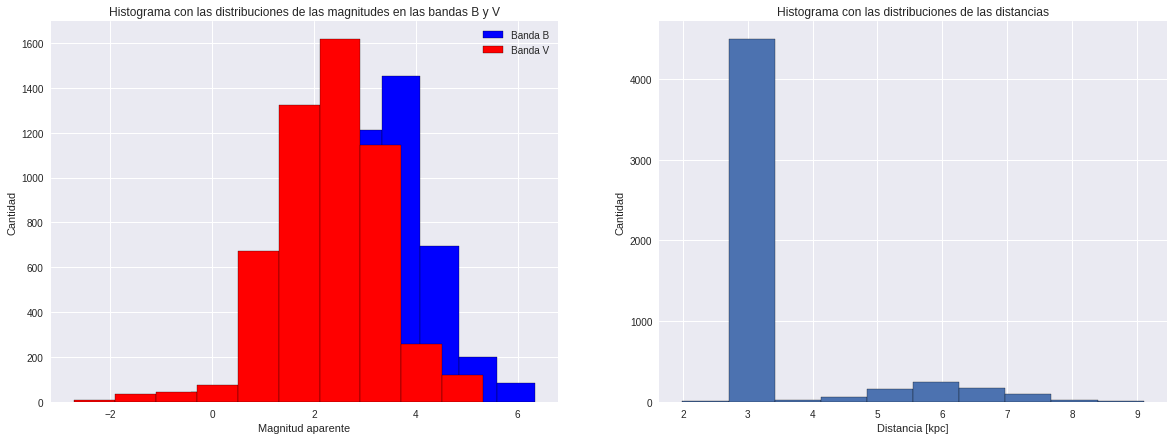

In [2]:
#Plotear histogramas de cada columna
import matplotlib.pyplot as plt
%matplotlib inline

mB_copia=mB.copy() #copiamos la columna mB
mV_copia=mV.copy() #copiamos la columna mV
d_copia=d.copy() #copiamos la columna d

fig, ax = plt.subplots(figsize= (20,7), ncols=2)

#Acá ploteamos el primer histograma pedido, con la distribución de las magnitudes en las bandas B y V, en azul y rojo respectivamente, con bordes negros
ax[0].hist(mB_copia, edgecolor = 'black', color='blue', label= 'Banda B')
ax[0].hist(mV_copia, edgecolor = 'black', color='red', label='Banda V')
ax[0].set(title='Histograma con las distribuciones de las magnitudes en las bandas B y V', ylabel='Cantidad', xlabel='Magnitud aparente') #trucazo del torpedo de matplotib
ax[0].legend()

#Acá ploteamos el segundo histograma pedido, con la distribución de distancias, con bordes negros
ax[1].hist(d_copia, edgecolor = 'black')
ax[1].set(title='Histograma con las distribuciones de las distancias', ylabel='Cantidad', xlabel='Distancia [kpc]') #trucazo del torpedo de matplotib
ax[1].legend()

## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [3]:
#Filtrar por distancia
datos_filtrados=datos.copy()
datos_filtrados=datos_filtrados[datos_filtrados[:,6]< 3.5]

n0=datos.size/7 #aquí se obtienen la cantidad de filas del arreglo
n=datos_filtrados.size/7

print ('El set original contenía '+ str(n0)+ ' estrellas, luego de filtrar quedaron '+str(n))

El set original contenía 5298 estrellas, luego de filtrar quedaron 4506


## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [0]:
#Funcion mag_abs(mag, dist)
def mag_abs(mag_ap, dist):
  M=mag_ap+5-(5*np.log10(1000*dist)) #notar que los arreglos se pueden operar sin problemas
  return M                           #por lo que no es necesario crear una lista, hacer un for y finalmente convertir la lista en un arreglo

## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

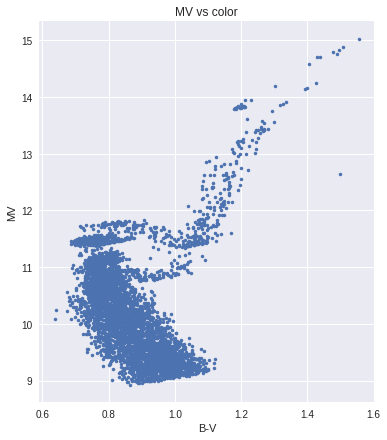

In [12]:
#Crear arrays MV y color
mB_filtrado=datos_filtrados[:,0] #obtenemos las columnas de mB, mV y d de los datos filtrados
mV_filtrado=datos_filtrados[:,1]
d_filtrado=datos_filtrados[:,6]

MV=mag_abs(mV_filtrado,d_filtrado) #usamos la función que habíamos creado previamente
color=mB_filtrado-mV_filtrado #restamos los arreglos sin ningún problema :D

#plot cmd
fig, ax = plt.subplots(figsize= (6,7), ncols=1)
ax.plot(color, -MV,'.') #usamos puntos
ax.set(title='MV vs color', ylabel='MV', xlabel='B-V') #trucazo del torpedo de matplotlib
ax.legend()

## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

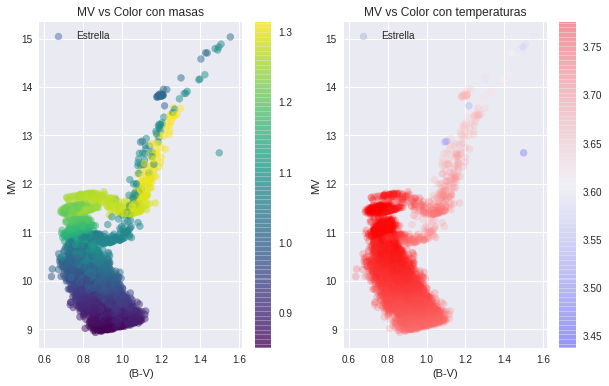

In [33]:
# plot cmd + masa  
logTe_filtrada=datos_filtrados[:,4]
masa_filtrada=datos_filtrados[:,5]

fig, ax = plt.subplots(figsize = (10,6), ncols = 2, sharex=True)

ax[0].scatter(color, -MV, label = 'Estrella', c= masa_filtrada, alpha = 0.5,cmap='viridis') #alpha va de 0 a 1 y usamos el color map de viridis

fig.colorbar(cbm, ax = ax[0])
ax[0].set_ylabel('MV')
ax[0].set_xlabel('(B-V)')
ax[0].set_title('MV vs Color con masas')
ax[0].legend()

#cmd + temp
ax[1].scatter(color, -MV, label = 'Estrella', c = logTe_filtrada, alpha = 0.2,cmap='bwr')
fig.colorbar(cbt, ax = ax[1])
ax[1].set_ylabel('MV')
ax[1].set_xlabel('(B-V)')
ax[1].set_title('MV vs Color con temperaturas')
ax[1].legend()

Text(0.5,1,'Histograma 2D MV vs Color con masas')

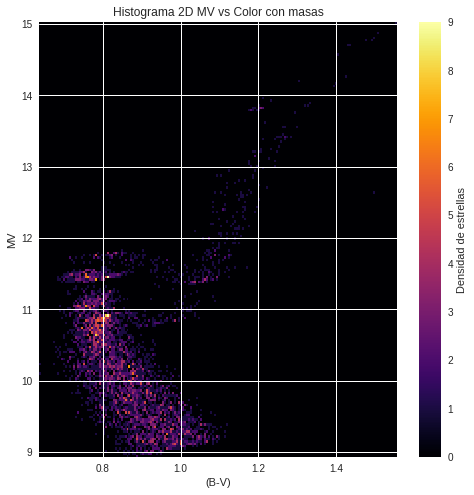

In [14]:
#plot cmd hist2D
fig, ax= plt.subplots(figsize=(8,8))
plt.hist2d(color, -MV, (180,180), cmap='inferno')
c=plt.colorbar()
c.ax.set_ylabel('Densidad de estrellas', rotation=90)
ax.set_ylabel('MV')
ax.set_xlabel('(B-V)')
ax.set_title('Histograma 2D MV vs Color con masas')

**Nota: Al fin pude terminar esta parte, luego de jugar al ensayo y error con los múltiples ax y plt que hay en el código, para poner título a los ejes y al colorbar, además de usar lo siguiente:**
https://stackoverflow.com/questions/15908371/matplotlib-colorbars-and-its-text-labels 